In [1]:
import pandas as pd
import numpy as np

In [2]:
#Importing Jerber data and preparing

RNA_hipsci_lines=pd.read_csv('hipsci-cell-lines.csv')[['Name']]

Jerber_assessed=pd.read_csv('Jerber2021_Lines_assessed.csv')
Jerber_assessed=Jerber_assessed.rename(columns={"Predicted neuronal differentiation efficiency scores for all HipSci lines": "Name",
                                "Unnamed: 1": "Assessed", "Unnamed: 3": "diff_efficiency"})
Jerber_assessed=Jerber_assessed[(Jerber_assessed.Assessed=="succeeded") | (Jerber_assessed.Assessed=="failed")][['Name', 'Assessed', "diff_efficiency"]] 

Jerber_assessed["Simple_Name"]=Jerber_assessed.Name.str[-6:]

In [3]:
assessed_RNA=pd.merge(Jerber_assessed, RNA_hipsci_lines, on='Name')
simple_names=assessed_RNA.Simple_Name
assessed_RNA['bin_outc']= np.where(assessed_RNA['Assessed']=="succeeded", 0, 1)
assessed_RNA

,Name,Assessed,diff_efficiency,Simple_Name,bin_outc
0,HPSI0114i-bezi_3,succeeded,0.582697201,bezi_3,0
1,HPSI0114i-eipl_1,failed,0.01287835,eipl_1,1
2,HPSI0114i-fikt_3,succeeded,0.402826855,fikt_3,0
3,HPSI0114i-kolf_2,succeeded,0.470591332,kolf_2,0
4,HPSI0114i-lexy_2,succeeded,0.726905347,lexy_2,0
...,...,...,...,...,...
138,HPSI1113i-vuud_2,succeeded,0.505408914,vuud_2,0
139,HPSI1114i-ualf_6,succeeded,0.575,ualf_6,0
140,HPSI1114i-zuuy_4,succeeded,0.376068376,zuuy_4,0
141,HPSI1213i-hehd_1,succeeded,0.780639404,hehd_1,0


In [4]:
# Which transcripts correspond to which gene
tx_per_gene=pd.read_csv("tx_per_gene_annot.csv", index_col=0)
tx_per_gene=tx_per_gene.rename(columns={"gene_id": "geneid"})

In [44]:
#Extracting the H3K27me3-related genes that we will use

clusters=pd.read_csv("Supplementary_File_1.csv", index_col=0)
#DEGs in hiPSCs for which H3K27me3 was predictive of transcription.
geneid_K27=clusters[(clusters.cluster=='K27') | (clusters.cluster=='K4&K27') | (clusters.cluster=='K4&K27&ATAC')].gene_id
txs_geneid_K27=tx_per_gene[tx_per_gene.geneid.isin(geneid_K27)]

#Genes missing in GRCh37, which appear in GRCh38
missing=['ENSG00000054598', 'ENSG00000229637', 'ENSG00000273604',
       'ENSG00000275023', 'ENSG00000279692']
txs_geneid_K27=txs_geneid_K27[~txs_geneid_K27.geneid.isin(missing)]

In [45]:
#Extracting the data for each line of the hiPSCi consortium evaluated

for line in simple_names:
    line_tx_rna=pd.read_csv('hipsci_RNA/'+line+'.tsv', sep='\t')
    line_tx_rna=line_tx_rna.rename(columns={'target_id':'tx_id', 'tpm':line})
    line_tx_rna=line_tx_rna[["tx_id", line]]
    txs_geneid_K27=pd.merge(txs_geneid_K27, line_tx_rna, how='left', on="tx_id")


In [46]:
tpm_geneid_K27=txs_geneid_K27.groupby('geneid').sum().T
tpm_geneid_K27=tpm_geneid_K27.drop('tx_id')
tpm_geneid_K27

geneid,ENSG00000006016,ENSG00000006128,ENSG00000007372,ENSG00000009709,ENSG00000020181,ENSG00000026025,ENSG00000053438,ENSG00000069812,ENSG00000075290,ENSG00000075388,...,ENSG00000205358,ENSG00000215474,ENSG00000215612,ENSG00000220008,ENSG00000221818,ENSG00000240065,ENSG00000242419,ENSG00000251493,ENSG00000266074,ENSG00000267909
bezi_3,11.48354,1.865195,5.06321,0.266086,0.440241,67.329042,21.279,0.339006,0.842338,0.175357,...,0.0,0.050399,0.152912,0.305104,0.16852,0.804757,3.24847,0.0,0.370026,3.02352
eipl_1,27.009553,0.95091,2.49406,2.554693,3.03734,261.220034,56.0406,1.542355,0.213957,0.69049,...,2.05892,0.162643,0.265602,0.341155,0.789508,0.269188,5.21783,0.0,10.074797,1.09617
fikt_3,15.45622,3.622563,0.445648,0.399028,0.86773,93.552177,0.231482,0.289233,0.731079,0.214225,...,0.352873,0.078871,0.085604,0.0,0.047499,0.062495,0.765246,0.0,0.118689,1.1195
kolf_2,19.712415,2.3945,0.363361,0.041248,1.224884,105.176115,5.07725,0.145655,0.346591,0.557491,...,52.30718,0.200097,0.139719,0.0,0.207377,0.375875,0.690142,0.0,0.245171,0.217274
lexy_2,7.296219,7.470543,0.221669,0.02758,0.40621,103.795458,9.38721,0.258448,0.094544,0.088939,...,3.551341,0.111109,0.038584,0.0,0.161349,0.418977,1.66561,0.0,0.064798,1.95364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vuud_2,16.209361,2.060189,0.439879,0.084199,0.657517,275.556802,6.97204,0.942007,1.02357,0.373407,...,17.213617,0.124232,0.104018,0.214294,0.256942,0.285222,1.57265,0.0,0.412919,0.349669
ualf_6,6.97647,1.568818,3.434297,0.921646,1.615601,334.236699,10.5833,0.775464,0.749146,0.2851,...,3.236419,0.03827,0.164967,0.427713,0.189891,0.381784,0.957502,0.153071,0.622421,1.01292
zuuy_4,7.491568,6.351459,21.043698,0.649588,0.692396,371.138546,34.7209,0.461433,5.1257,0.266959,...,6.337416,0.145086,0.386455,0.19989,0.316928,0.401155,0.978905,0.0,0.632603,0.748772
hehd_1,15.0898,2.381057,0.52003,0.244798,1.451619,298.517157,5.40671,1.102763,0.964561,0.856815,...,5.15884,0.293333,0.061274,0.283034,0.51391,0.097943,0.770983,0.0,0.426031,0.665853


In [47]:
# Bootstrapping to retain most reliable features

#Sample prep
Xall=tpm_geneid_K27.to_numpy()
Yall=np.array(assessed_RNA.bin_outc.values, dtype='int')

samplesX = tuple(Xall[:, i] for i in range(Xall.shape[1]))
samples = samplesX + (Yall,)

In [48]:
import scipy.stats as sts
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import pipeline
from sklearn import preprocessing

In [49]:
#Function that returns the coefficients of the Logistic Regression.
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
pipe = pipeline.Pipeline([('scaler', MinMaxScaler()),
                          ('LR', LogisticRegression(solver="liblinear", C=1, random_state=42))])

def coeff_reg_scaled(*samples):
    samples = np.asarray(samples)
    X = samples[:-1].T
    y = np.array(samples[-1], dtype='int')
    #C=1, lenient regularisation to explore larger values of coefficients
    clf = pipe.fit(X, y)
    return clf['LR'].coef_

In [50]:
res = sts.bootstrap(samples, statistic=coeff_reg_scaled, 
                    n_resamples=9999, paired=True, random_state=24601)#, method='basic')

In [51]:
#Columns that we are retaining for final model
fcols=np.sign(res.confidence_interval[0][0])==np.sign(res.confidence_interval[1][0])


In [59]:
#Create model and test model

rpipe = pipeline.Pipeline([('scaler', MinMaxScaler()),
                          ('LR', LogisticRegression(solver="liblinear", C=0.1, random_state=42))])

In [60]:
#Filtered data

f_tpm_geneid_K27=tpm_geneid_K27[tpm_geneid_K27.columns[fcols]]

Xall=f_tpm_geneid_K27.to_numpy()
Yall=np.array(assessed_RNA.bin_outc.values, dtype='int')

samplesX = tuple(Xall[:, i] for i in range(Xall.shape[1]))
samples = samplesX + (Yall,)


In [16]:
#Function for within-sample PR curve.

def prc_DN(*samples):
    samples = np.asarray(samples)
    
    X = samples[:-1].T
    y = samples[-1]

    test=[]
    preds=[]

    for i in range(X.shape[0]):
        X_train=X[[col != i for col in range(X.shape[0])],:]
        Y_train=y[[col != i for col in range(X.shape[0])]].astype(int)
        X_test=X[i,:]
        Y_test=y[i]
        
        clf = rpipe.fit(X_train, Y_train)
        pred_case=clf.predict_proba(X_test.reshape(1,-1))
        preds.append(pred_case[:,1])
        test.append(Y_test)
    
    prec, rec, thres=sk.metrics.precision_recall_curve(test,preds)
    auc=sk.metrics.auc(rec, prec)
    return auc

In [17]:
#Function for within-sample RO curve.

def avs_DN(*samples):
    samples = np.asarray(samples)
    
    X = samples[:-1].T
    y = samples[-1]

    test=[]
    preds=[]

    for i in range(X.shape[0]):
        X_train=X[[col != i for col in range(X.shape[0])],:]
        Y_train=y[[col != i for col in range(X.shape[0])]].astype(int)
        X_test=X[i,:]
        Y_test=y[i]
        
        clf = rpipe.fit(X_train, Y_train)
        pred_case=clf.predict(X_test.reshape(1,-1))
        preds.append(pred_case)
        test.append(Y_test)
    
    avs = 0
    for i in range(len(test)):  
        avs += abs(test[i] - preds[i])
    avs = avs/(len(test))  # Normalize by the actual number of test samples

    return avs 

In [18]:
res = sts.bootstrap(samples, statistic=avs_DN, 
                    n_resamples=999, paired=True, random_state=24601, method='BCa')

In [19]:
res.confidence_interval

ConfidenceInterval(low=array([0.13986014]), high=array([0.25174825]))

In [30]:
np.mean(res.bootstrap_distribution)

np.float64(0.1848981848981849)

In [ ]:
#Function for accuracy.

def rec100_DN(*samples):
    samples = np.asarray(samples)
    
    X = samples[:-1].T
    y = samples[-1]

    test=[]
    preds=[]

    for i in range(X.shape[0]):
        X_train=X[[col != i for col in range(X.shape[0])],:]
        Y_train=y[[col != i for col in range(X.shape[0])]].astype(int)
        X_test=X[i,:]
        Y_test=y[i]
        
        clf = rpipe.fit(X_train, Y_train)
        pred_case=clf.predict_proba(X_test.reshape(1,-1))
        preds.append(pred_case[:,1])
        test.append(Y_test)
    
    prec, rec, thres=sk.metrics.precision_recall_curve(test,preds)
    for i in range(len(prec)):
        if prec[i]==1.0:
            rec100=rec[i]
            break
        
    return rec100

In [82]:
res100 = sts.bootstrap(samples, statistic=rec100_DN, 
                    n_resamples=999, paired=True, random_state=24601)#, method='basic')

In [ ]:
res100.confidence_interval

In [ ]:
np.mean(res100.bootstrap_distribution)

In [85]:
#Adding age, sex to dataset.

cell_metadata=pd.read_csv('hipsci-cell-lines.csv', skipinitialspace=True)

In [86]:
cell_metadata['Simple_Name']=cell_metadata.Name.str[-6:]


In [87]:
f_tpm_geneid_K27_meta=f_tpm_geneid_K27.copy()

In [88]:
for name in simple_names:
    f_tpm_geneid_K27_meta.loc[name,'Age']=int(cell_metadata[cell_metadata.Simple_Name==name]['Age'].str[0:2].iloc[0])+2
    bool_sex=cell_metadata[cell_metadata.Simple_Name==name]['Sex'].values=='Female'
    f_tpm_geneid_K27_meta.loc[name,'Sex']=int(bool_sex[0])  

In [89]:
f_tpm_geneid_K27_meta

geneid,ENSG00000007372,ENSG00000075388,ENSG00000108557,ENSG00000113430,ENSG00000116819,ENSG00000116833,ENSG00000119042,ENSG00000122859,ENSG00000125285,ENSG00000125878,...,ENSG00000189067,ENSG00000189127,ENSG00000196092,ENSG00000197380,ENSG00000198719,ENSG00000204618,ENSG00000215612,ENSG00000221818,Age,Sex
bezi_3,5.06321,0.175357,2.914982,0.626971,0.29691,1.643787,1.826185,0.2696,35.9342,5.76032,...,109.927872,2.19567,0.101032,1.895779,4.28088,0.304176,0.152912,0.16852,62.0,1.0
eipl_1,2.49406,0.69049,7.622323,7.811837,0.530882,17.197377,8.84913,1.81363,40.8258,2.17181,...,63.122059,0.929432,2.20107,2.254962,12.4297,0.321169,0.265602,0.789508,42.0,1.0
fikt_3,0.445648,0.214225,1.481963,0.734162,0.141399,3.491472,1.896112,0.317424,13.718,6.73843,...,107.107309,6.49486,0.04528,2.272773,1.9097,0.224655,0.085604,0.047499,52.0,0.0
kolf_2,0.363361,0.557491,0.885468,1.542081,0.18936,6.603741,1.787757,0.054294,3.86655,3.17132,...,107.886158,3.33534,0.074509,1.306478,0.628433,0.0,0.139719,0.207377,57.0,0.0
lexy_2,0.221669,0.088939,1.084583,0.423204,0.153067,2.524984,1.438092,0.029273,1.31917,7.46943,...,66.56932,2.232944,0.068984,1.205255,0.815017,0.106533,0.038584,0.161349,62.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vuud_2,0.439879,0.373407,2.302351,0.589477,0.336417,4.735665,2.073296,0.387223,17.3241,4.11259,...,171.53347,5.60437,0.091673,3.668433,6.9344,0.259598,0.104018,0.256942,57.0,1.0
ualf_6,3.434297,0.2851,3.137404,0.825669,0.352231,1.853994,1.128281,0.01973,46.3562,3.88355,...,238.96775,3.5078,0.148745,3.462744,3.05679,0.323888,0.164967,0.189891,57.0,1.0
zuuy_4,21.043698,0.266959,2.152098,0.062309,0.208488,1.6158,1.750177,0.118232,15.2712,2.91055,...,120.343919,2.91209,0.202851,2.40172,2.68693,0.115007,0.386455,0.316928,72.0,1.0
hehd_1,0.52003,0.856815,1.488838,0.428005,0.283147,3.200704,1.419991,0.100003,24.6963,3.52217,...,202.039264,4.6578,0.144949,3.680896,2.50151,0.117623,0.061274,0.51391,62.0,1.0


In [90]:
# Bootstrapping to retain most reliable (meta)features

#Sample prep
Xall=f_tpm_geneid_K27_meta.to_numpy()
Yall=np.array(assessed_RNA.bin_outc.values, dtype='int')

samplesX = tuple(Xall[:, i] for i in range(Xall.shape[1]))
samples_meta = samplesX + (Yall,)

In [92]:
res_meta = sts.bootstrap(samples_meta, statistic=prc_DN, 
                    n_resamples=999, paired=True, random_state=24601, method='BCa')

In [93]:
res_meta.confidence_interval

ConfidenceInterval(low=np.float64(0.6561144080022371), high=np.float64(0.8627471306648624))

In [94]:
np.mean(res_meta.bootstrap_distribution)

np.float64(0.8324352713895539)

In [95]:
res100meta = sts.bootstrap(samples_meta, statistic=rec100_DN, 
                    n_resamples=999, paired=True, random_state=24601)#, method='basic')

In [96]:
res100meta.confidence_interval

ConfidenceInterval(low=np.float64(0.111453092650552), high=np.float64(0.4883720930232558))

In [97]:
np.mean(res100meta.bootstrap_distribution)

np.float64(0.4409245765273213)

## Computing correlations between expression and differentiation ##

In [21]:
#Reading genes

PGCLCgenes=pd.read_csv('genes_PGCLC_pred.csv', index_col=0)
TPMS_reps = pd.read_csv('TPMS_hiPSC.csv', index_col=0)
PGCLCgenes=PGCLCgenes.rename(columns={'0':'geneid'})
TPMS_reps_PGCLC=pd.merge(TPMS_reps, PGCLCgenes, on="geneid")
TPMS_reps_PGCLC=TPMS_reps_PGCLC.set_index('geneid')


In [22]:
# PGCLC differentiation success
DP=[1,1,1,1,1,1,0,0,0,0,1,1,1,1,0,0,1,1,0,0,0]

#To flag the least-common outcome: Failed->1
rDP=np.ones(21)-DP

rDPdf=pd.DataFrame(rDP.reshape(1,-1), columns=TPMS_reps_PGCLC.columns, index=["PGCLC_success"])
TPMS_reps_PGCLC=pd.concat([TPMS_reps_PGCLC,rDPdf])

#Computing correlation between expression and differentiation efficiency to PGCLCs
PGCLC_corrs=TPMS_reps_PGCLC.T.corr().iloc[109,0:109]

In [23]:
TPMS_hiPSCi=tpm_geneid_K27[PGCLCgenes.values.T[0]].copy()
TPMS_hiPSCi['DN_succ']=assessed_RNA.bin_outc.values

#Computing correlation between expression and differentiation efficiency to DNs
DN_corrs=TPMS_hiPSCi.corr().iloc[109,0:109]

In [24]:
sts.pearsonr(DN_corrs, PGCLC_corrs)

PearsonRResult(statistic=np.float64(0.7148888905566941), pvalue=np.float64(2.5301340626615483e-18))

In [25]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import rc

plt.rcParams.update({'font.size': 16})
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})

In [26]:
# Values obtained above in the notebook and "Differentiation_prediction.ipynb (for PGCLC)
metrics=pd.DataFrame(data={"Model":["Jerber2021","Jerber2021","PGCLC","PGCLC","Neurons","Neurons", "metaDN", "metaDN"],
                           "Metric":["Recall", "AUPRC","Recall", "AUPRC","Recall", "AUPRC","Recall", "AUPRC"],
                           "Value":[0.35, 0.64, 0.3574 ,0.691, 0.4534, 0.8501, 0.4409, 0.8324]})

In [27]:
lower_error=pd.DataFrame(data={"Model":["PGCLC","PGCLC","Neurons","Neurons", "metaDN", "metaDN"],
                           "Metric":["Recall", "AUPRC","Recall", "AUPRC","Recall", "AUPRC"],
                           "Value":[0.1429, 0.5394, 0.1873 ,0.6895, 0.1115, 0.6561]})
upper_error=pd.DataFrame(data={"Model":["PGCLC","PGCLC","Neurons","Neurons", "metaDN", "metaDN"],
                           "Metric":["Recall", "AUPRC","Recall", "AUPRC","Recall", "AUPRC"],
                           "Value":[0.4651, 0.8006, 0.5359 ,0.8926, 0.4884, 0.8627]})

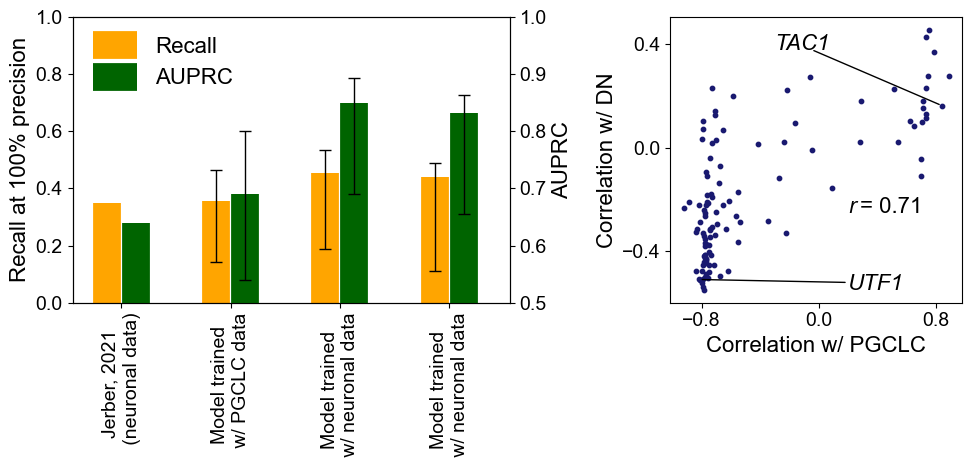

In [28]:
#Script for Figure 7

fig, ax1=plt.subplots(1,2, figsize=(10,5.0),  width_ratios=[1.5, 1])
xax=np.arange(4)*0.45
cluster_names=['Jerber, 2021 \n (neuronal data)', 'Model trained \n w/ PGCLC data', 
               'Model trained \n w/ neuronal data', 'Model trained \n w/ neuronal data']

ax20= ax1[0].twinx() 

ax1[0].set_ylabel("Recall at 100% precision")
ax1[0].set_ylim([0.0,1.0])
ax1[0].set_xlim([-0.2,1.6])
ax20.set_ylabel("AUPRC")
ax20.set_ylim([0.5,1.0])

ax1[0].plot([xax[0]-0.06,xax[0]-0.06],[0,metrics.Value[0]], color="orange", linewidth=20, label="Recall", solid_capstyle="butt")
ax20.plot([xax[0]+0.06,xax[0]+0.06],[0,metrics.Value[1]], color="darkgreen", linewidth=20, label="AUPRC", solid_capstyle="butt")

ax1[0].plot([xax[1]-0.06,xax[1]-0.06],[0,metrics.Value[2]], color="orange", linewidth=20, solid_capstyle="butt")
ax1[0].errorbar(xax[1]-0.06,metrics.Value[2], yerr=np.array([metrics.Value[2]-lower_error.Value[0], upper_error.Value[0]-metrics.Value[2]]).reshape(-1,1),
               color='black', linewidth=1, capsize=4)
ax20.plot([xax[1]+0.06,xax[1]+0.06],[0,metrics.Value[3]], color="darkgreen", linewidth=20, solid_capstyle="butt")
ax20.errorbar(xax[1]+0.06,metrics.Value[3], yerr=np.array([metrics.Value[3]-lower_error.Value[1], upper_error.Value[1]-metrics.Value[3]]).reshape(-1,1),
               color='black', linewidth=1, capsize=4)

ax1[0].plot([xax[2]-0.06,xax[2]-0.06],[0,metrics.Value[4]], color="orange", linewidth=20, solid_capstyle="butt")
ax1[0].errorbar(xax[2]-0.06,metrics.Value[4], yerr=np.array([metrics.Value[4]-lower_error.Value[2], upper_error.Value[2]-metrics.Value[4]]).reshape(-1,1),
               color='black', linewidth=1, capsize=4)
ax20.plot([xax[2]+0.06,xax[2]+0.06],[0,metrics.Value[5]], color="darkgreen", linewidth=20, solid_capstyle="butt")
ax20.errorbar(xax[2]+0.06,metrics.Value[5], yerr=np.array([metrics.Value[5]-lower_error.Value[3], upper_error.Value[3]-metrics.Value[5]]).reshape(-1,1),
               color='black', linewidth=1, capsize=4)

ax1[0].plot([xax[3]-0.06,xax[3]-0.06],[0,metrics.Value[6]], color="orange", linewidth=20, solid_capstyle="butt")
ax1[0].errorbar(xax[3]-0.06,metrics.Value[6], yerr=np.array([metrics.Value[6]-lower_error.Value[4], upper_error.Value[4]-metrics.Value[6]]).reshape(-1,1),
               color='black', linewidth=1, capsize=4)
ax20.plot([xax[3]+0.06,xax[3]+0.06],[0,metrics.Value[7]], color="darkgreen", linewidth=20, solid_capstyle="butt")
ax20.errorbar(xax[3]+0.06,metrics.Value[7], yerr=np.array([metrics.Value[7]-lower_error.Value[5], upper_error.Value[5]-metrics.Value[7]]).reshape(-1,1),
               color='black', linewidth=1, capsize=4)

ax1[1].scatter(-PGCLC_corrs, -DN_corrs, s=10, color="midnightblue")
ax1[1].set_xlabel("Correlation w/ PGCLC")
ax1[1].set_ylabel("Correlation w/ DN")
ax1[1].set_yticks([-0.4,0,0.4])
ax1[1].set_xticks([-0.8,0,0.8])


init=[-PGCLC_corrs[PGCLC_corrs.index=="ENSG00000006128"].iloc[0], -DN_corrs[DN_corrs.index=="ENSG00000006128"].iloc[0]]
end=[-0.05,0.38]
ax1[1].annotate("", xytext=init, xy=end,
            arrowprops=dict(arrowstyle="-"))
ax1[1].annotate("TAC1",  xy=(-0.3, 0.38),  style='italic')

init=[-PGCLC_corrs[PGCLC_corrs.index=="ENSG00000171794"].iloc[0], -DN_corrs[DN_corrs.index=="ENSG00000171794"].iloc[0]]
end=[0.2,-0.52]
ax1[1].annotate("", xytext=init, xy=end,
            arrowprops=dict(arrowstyle="-"))
ax1[1].annotate("UTF1",  xy=(0.2, -0.55),  style='italic')
ax1[1].annotate("r",  xy=(0.2, -0.25),  style='italic')
ax1[1].annotate("= 0.71",  xy=(0.28, -0.252))

ax1[0].legend(loc='upper left', frameon=False)
ax20.legend(bbox_to_anchor=(0.412,0.89), frameon=False)

ax1[0].set_xticks(xax, cluster_names, rotation=90)

plt.tight_layout()

plt.savefig("Fig7AB.png", format='png', dpi=300)


In [64]:
#Final model to obtain weights of the logistic regression with the entire dataset (creation of SF2).
#Note that 1) Xall, Yall need to be filtered first (to use only 47 genes)
# and 2) the logistic regression assumes that outcome=1 is failure to differentiate (success=0)

clf=rpipe.fit(Xall, Yall)
weights=clf['LR'].coef_
genes=f_tpm_geneid_K27.columns

LR_coeffs=pd.DataFrame(data={'gene_id': genes, 'LR_weights': weights[0]})
LR_coeffs=pd.merge(LR_coeffs, clusters[['gene_id', 'gene_name']], on="gene_id")
LR_coeffs.to_csv("Supplementary_File_2.csv")